In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')

In [3]:
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


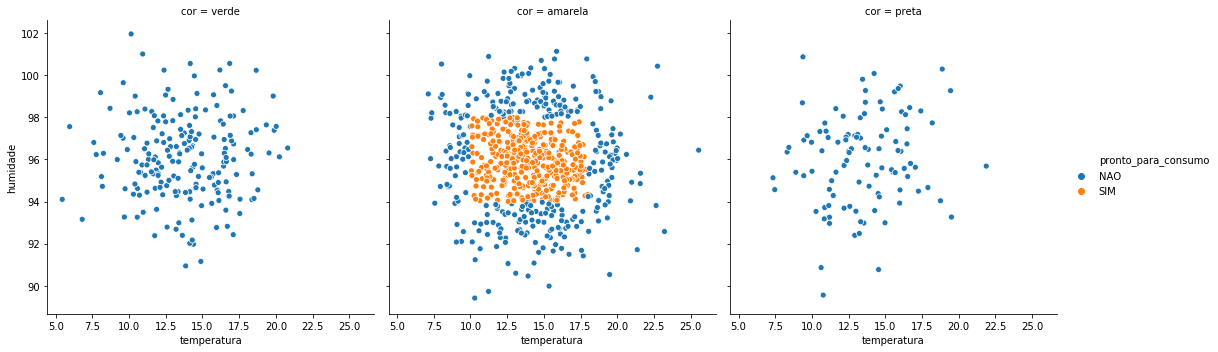

In [4]:
# Comportamento dos dados
sns.relplot(x='temperatura', y='humidade',col='cor', hue='pronto_para_consumo', data=df)

In [5]:
#Preparando o Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
temperatura            1000 non-null float64
humidade               1000 non-null float64
cor                    1000 non-null object
pronto_para_consumo    1000 non-null object
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [7]:
df['cor'].describe()

count        1000
unique          3
top       amarela
freq          703
Name: cor, dtype: object

In [8]:
swap = {'SIM': 1, 'NAO': 0}
df['pronto_para_consumo'] = df['pronto_para_consumo'].map(swap)

In [9]:
cores = df['cor'].str.get_dummies()

In [10]:
cores.sum()

amarela    703
preta      103
verde      194
dtype: int64

In [11]:
df_bananas = pd.concat([df, cores], axis=1)
df_bananas.drop(['cor'], axis = 1)
df_bananas = df_bananas[['temperatura', 'humidade', 'amarela', 'preta', 'verde', 'pronto_para_consumo']]
df_bananas.head()

,temperatura,humidade,amarela,preta,verde,pronto_para_consumo
0,9.590963,97.007535,0,0,1,0
1,18.081287,96.467236,0,0,1,0
2,12.884049,95.604222,1,0,0,1
3,18.831052,96.641953,1,0,0,0
4,13.539014,92.978037,0,1,0,0


In [12]:
# Separando e normalizando os dados de treinamento e teste
x = df_bananas[['temperatura', 'humidade', 'amarela', 'preta', 'verde']]
y = df_bananas['pronto_para_consumo']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


In [13]:
# Definindo o Baseline com DummyClassifier

dummy_stratified = DummyClassifier(strategy='most_frequent')
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y) * 100


60.8

In [14]:
# Preparando e Comparando algoritmos de classificação

In [15]:
# SVC

model_svc = SVC(random_state=20)
model_svc.fit(treino_x, treino_y)
previsoes_svc = model_svc.predict(teste_x)

acc_svc = accuracy_score(teste_y, previsoes_svc)
print(f'Accuracy SVC: {acc_svc*100}')

Accuracy SVC: 96.39999999999999


In [16]:
# Linear SVC

model_lsvc = LinearSVC()
model_lsvc.fit(treino_x, treino_y)
previsoes_lsvc = model_lsvc.predict(teste_x)

acc_lsvc = accuracy_score(teste_y, previsoes_lsvc)
print(f'Accuracy Linear SVC: {acc_lsvc*100}')

Accuracy Linear SVC: 68.8


In [17]:
# Decision Tree

model_dtree = DecisionTreeClassifier()
model_dtree.fit(treino_x, treino_y)
previsoes_dtree = model_dtree.predict(teste_x)

acc_dtree = accuracy_score(teste_y, previsoes_dtree)
print(f'Accuracy Decision Tree: {acc_dtree*100}')

Accuracy Decision Tree: 99.6


In [18]:
# Aplicando os modelos no dataset original

data_input = scaler.transform(x)

df_previsoes_svc = pd.DataFrame(model_svc.predict(data_input), columns=['previsoes'])
df_previsoes_lsvc = pd.DataFrame(model_lsvc.predict(data_input), columns=['previsoes'])
df_previsoes_dtree = pd.DataFrame(model_dtree.predict(data_input), columns=['previsoes'])

In [19]:
acc_svc = accuracy_score(y, df_previsoes_svc)
print(f'Accuracy SVC: {acc_svc*100}')

Accuracy SVC: 96.1


In [20]:
acc_lsvc = accuracy_score(y, df_previsoes_lsvc)
print(f'Accuracy Linear SVC: {acc_lsvc*100}')

Accuracy Linear SVC: 69.3


In [21]:
acc_dtree = accuracy_score(y, df_previsoes_dtree)
print(f'Accuracy Decision Tree: {acc_dtree*100}')

Accuracy Decision Tree: 99.9


In [22]:
# Concatenando DataFrame Bananas com o resultado das previsões.
df_bananas_svc = pd.concat([df_bananas, df_previsoes_svc], axis=1)
df_bananas_lsvc = pd.concat([df_bananas, df_previsoes_lsvc], axis=1)
df_bananas_dtree = pd.concat([df_bananas, df_previsoes_dtree], axis=1)

In [23]:
# Função para comparar resultado das previsões com o resultado real
def acertou(row):
    if row['pronto_para_consumo'] == row['previsoes']:
        return True
    else:
        return False
    

In [24]:
# Aplicando a Função nos DataFrames
df_bananas_svc['acertou'] = df_bananas_svc.apply(acertou, axis=1)
df_bananas_lsvc['acertou'] = df_bananas_lsvc.apply(acertou, axis=1)
df_bananas_dtree['acertou'] = df_bananas_dtree.apply(acertou, axis=1)

In [25]:
# Analisando os resultados

In [26]:
# SVC
accuracy_score(df_bananas_svc['pronto_para_consumo'], df_bananas_svc['previsoes'])*100

96.1

In [27]:
df_bananas_svc['acertou'].value_counts()

True     961
False     39
Name: acertou, dtype: int64

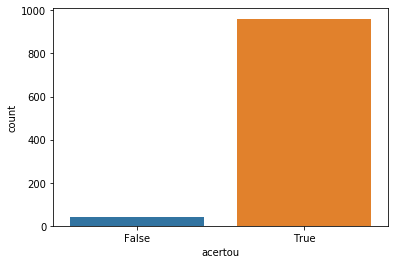

In [28]:
sns.countplot(x='acertou', data=df_bananas_svc)

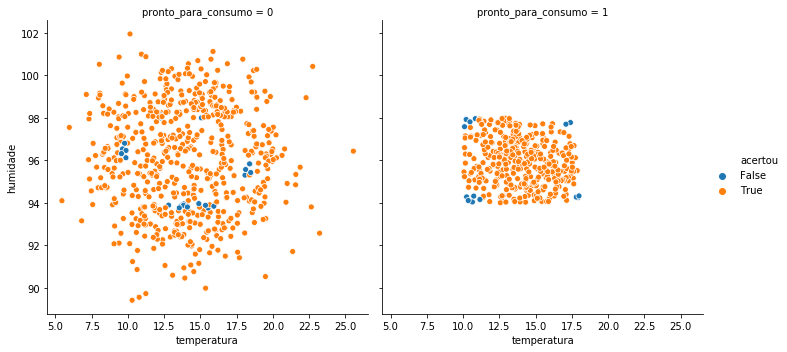

In [29]:
# Resultados das previsoes, Laranja: Acertos / Azul: Erros
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertou', data=df_bananas_svc)

In [30]:
# LSVC
accuracy_score(df_bananas_lsvc['pronto_para_consumo'], df_bananas_lsvc['previsoes'])*100

69.3

In [31]:
df_bananas_lsvc['acertou'].value_counts()

True     693
False    307
Name: acertou, dtype: int64

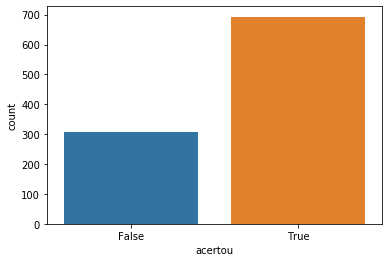

In [32]:
sns.countplot(x='acertou', data=df_bananas_lsvc)

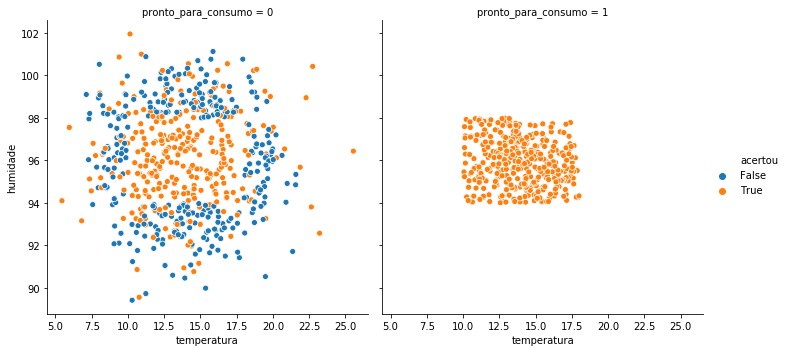

In [33]:
# Resultados das previsoes, Laranja: Acertos / Azul: Erros
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertou', data=df_bananas_lsvc)

In [34]:
# Decision Tree
accuracy_score(df_bananas_dtree['pronto_para_consumo'], df_bananas_dtree['previsoes'])*100

99.9

In [35]:
df_bananas_dtree['acertou'].value_counts()

True     999
False      1
Name: acertou, dtype: int64

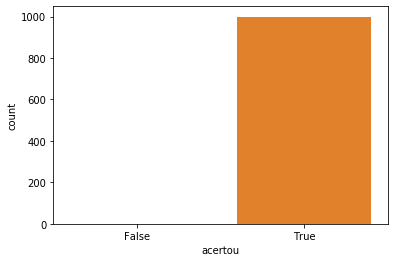

In [36]:
sns.countplot(x='acertou', data=df_bananas_dtree)

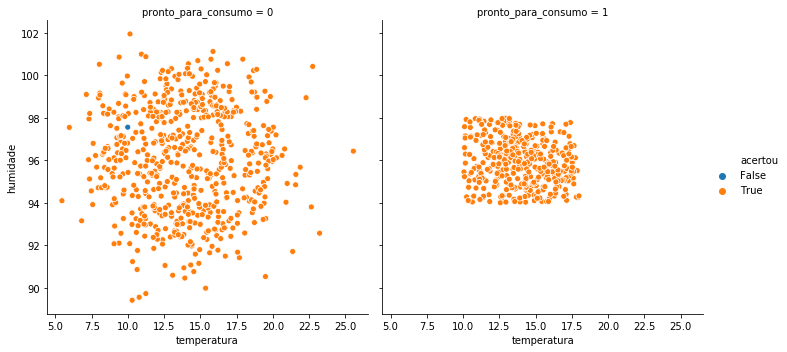

In [37]:
# Resultados das previsoes, Laranja: Acertos / Azul: Erros
sns.relplot(x='temperatura', y='humidade', col='pronto_para_consumo', hue='acertou', data=df_bananas_dtree)

[Text(697.5, 830.5, 'amarela <= -0.443\nentropy = 0.476\nsamples = 750\nvalue = [457, 293]\nclass = no'),
 Text(558.0, 679.5, 'entropy = 0.0\nsamples = 223\nvalue = [223, 0]\nclass = no'),
 Text(837.0, 679.5, 'humidade <= 0.994\nentropy = 0.494\nsamples = 527\nvalue = [234, 293]\nclass = yes'),
 Text(697.5, 528.5, 'humidade <= -0.932\nentropy = 0.44\nsamples = 435\nvalue = [142, 293]\nclass = yes'),
 Text(279.0, 377.5, 'humidade <= -0.949\nentropy = 0.021\nsamples = 94\nvalue = [93, 1]\nclass = no'),
 Text(139.5, 226.5, 'entropy = 0.0\nsamples = 91\nvalue = [91, 0]\nclass = no'),
 Text(418.5, 226.5, 'humidade <= -0.942\nentropy = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(279.0, 75.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(558.0, 75.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(1116.0, 377.5, 'temperatura <= 1.365\nentropy = 0.246\nsamples = 341\nvalue = [49, 292]\nclass = yes'),
 Text(976.5, 226.5, 'temperatura <= -1.371\ne

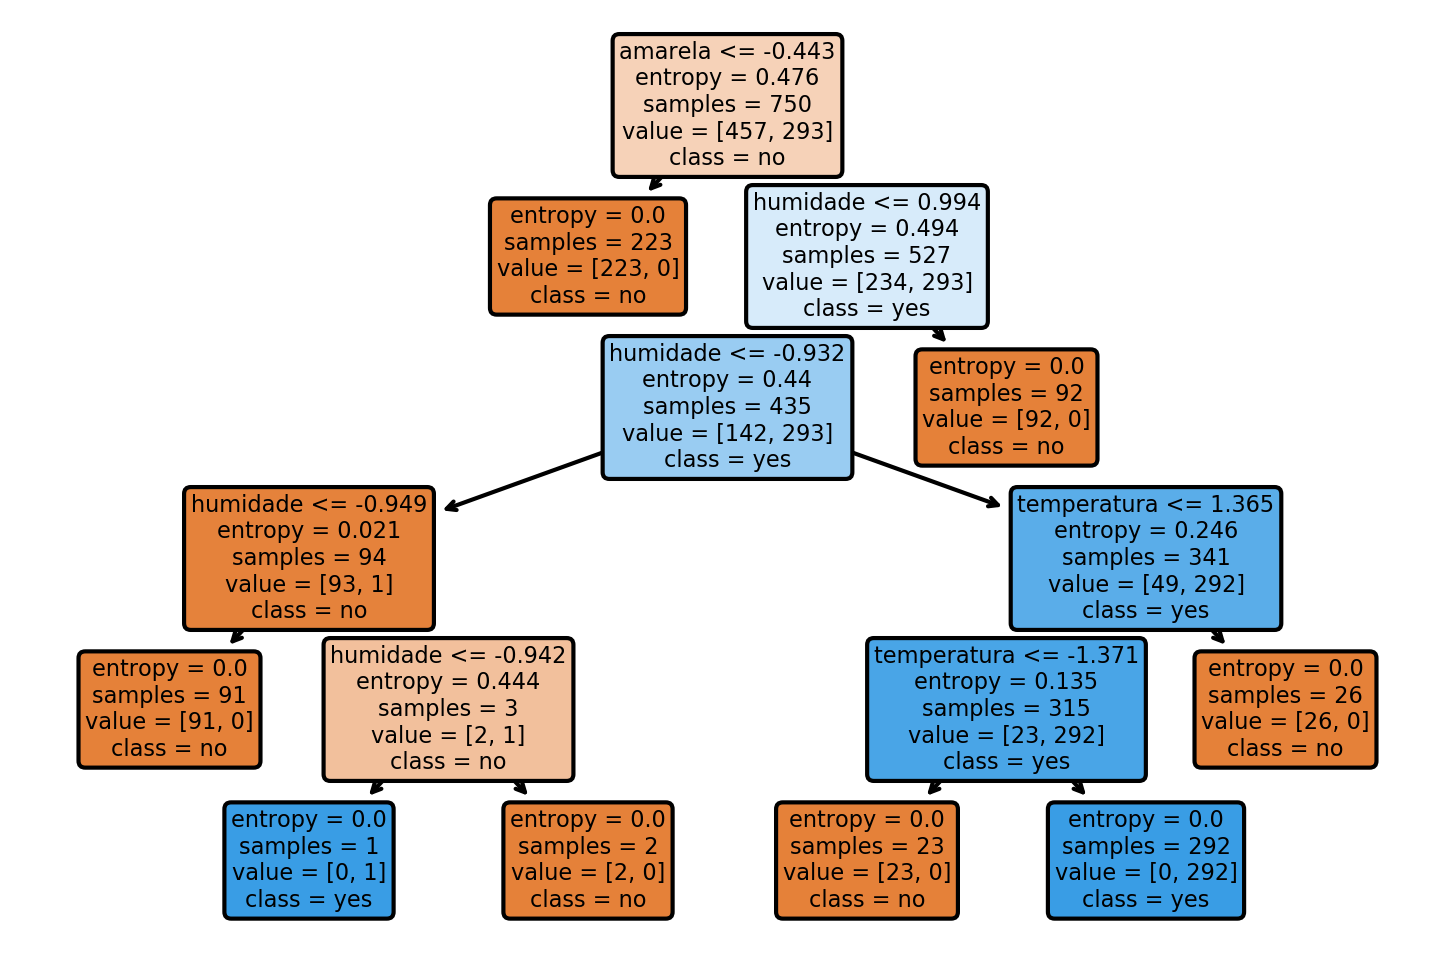

In [38]:
# Arvore de decisão 

from sklearn.tree import plot_tree

features = x.columns

plt.figure(dpi=300)
plot_tree(model_dtree, filled=True, feature_names=features, rounded=True, class_names= ['no', 'yes'])